In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
plt.rcParams['figure.figsize'] = (16, 10)
sns.set_theme(palette='dark')


In [ ]:
df_original = pd.read_csv('credit_card_customers.csv')
RANDOM_SEED = 1
df_original

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df = df_original.drop('CUST_ID', axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**ANALISI ESPLORATIVA DEI DATI **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**ANALISI UNIVARIATA DELLE FEATURES**

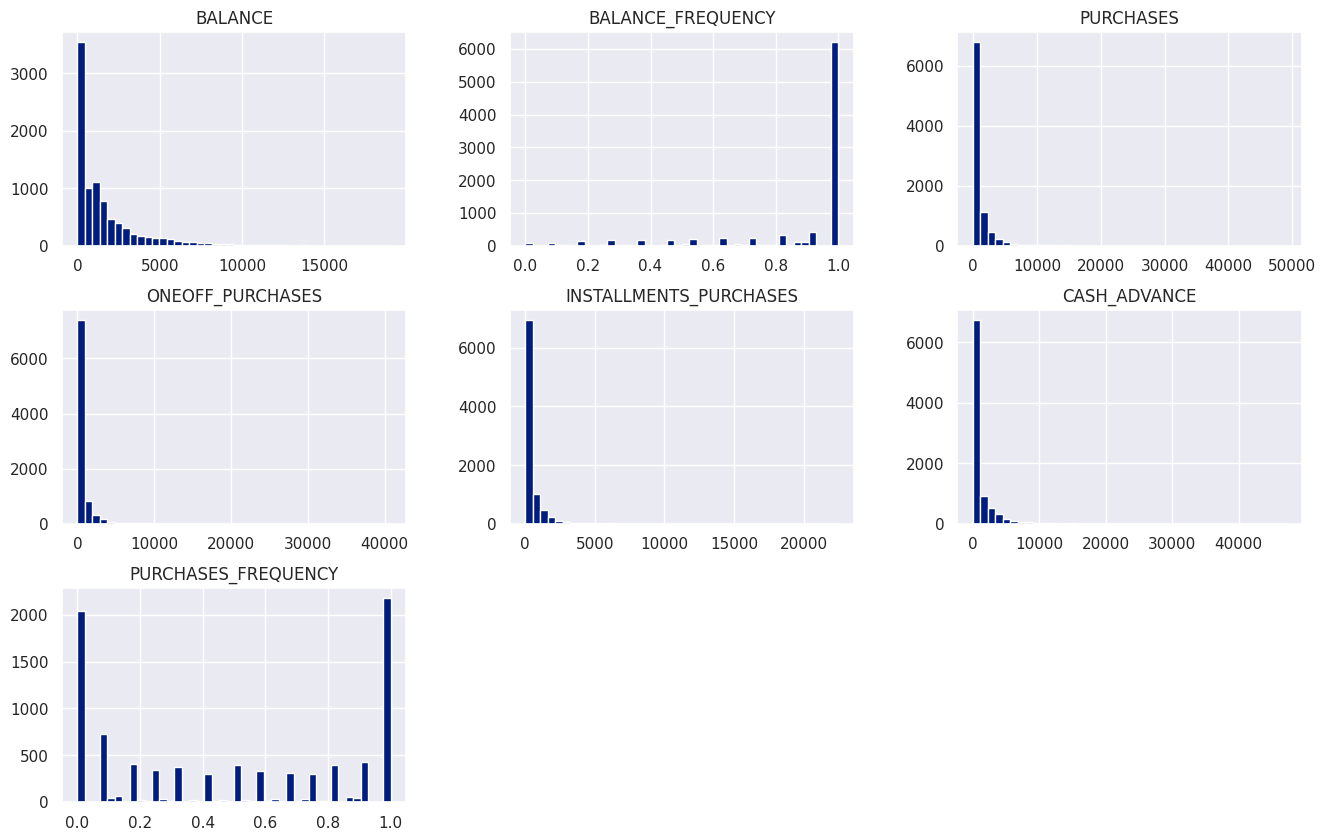

In [ ]:
df.iloc[:,0:7].hist(bins='rice')

plt.show()

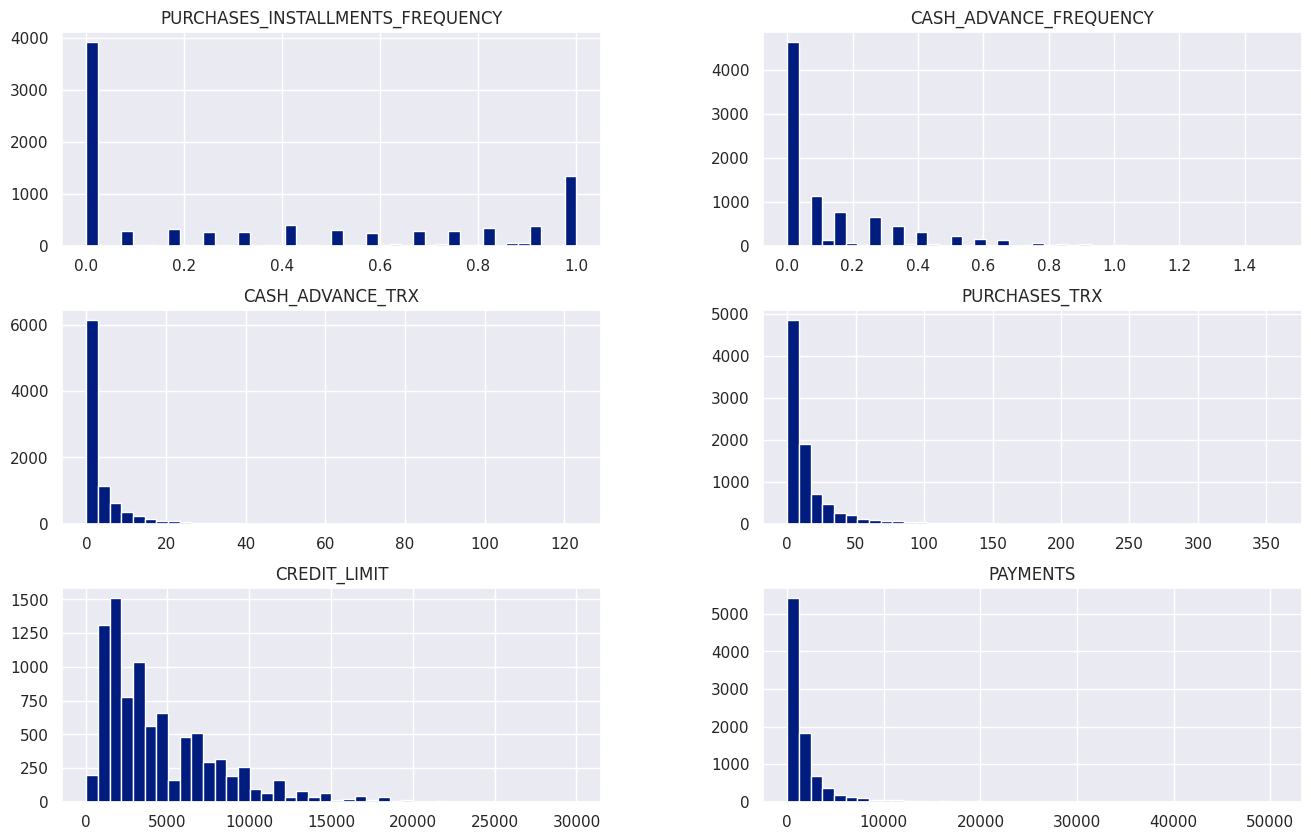

In [ ]:
df.iloc[:,8:14].hist(bins='rice')

plt.show()

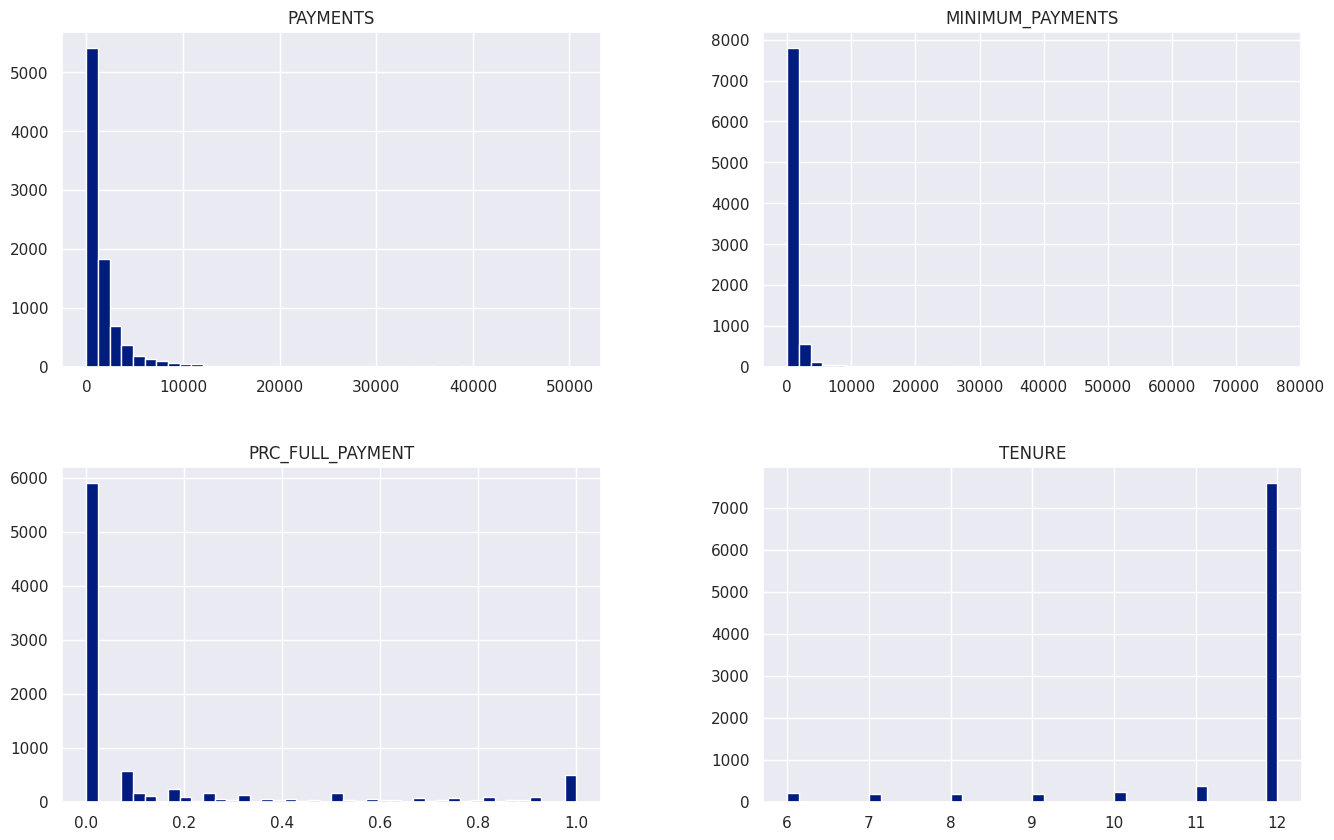

In [ ]:
df.iloc[:,13:17].hist(bins='rice')

plt.show()

**ANALISI MULTIVARIATA DELLE FEATURES**

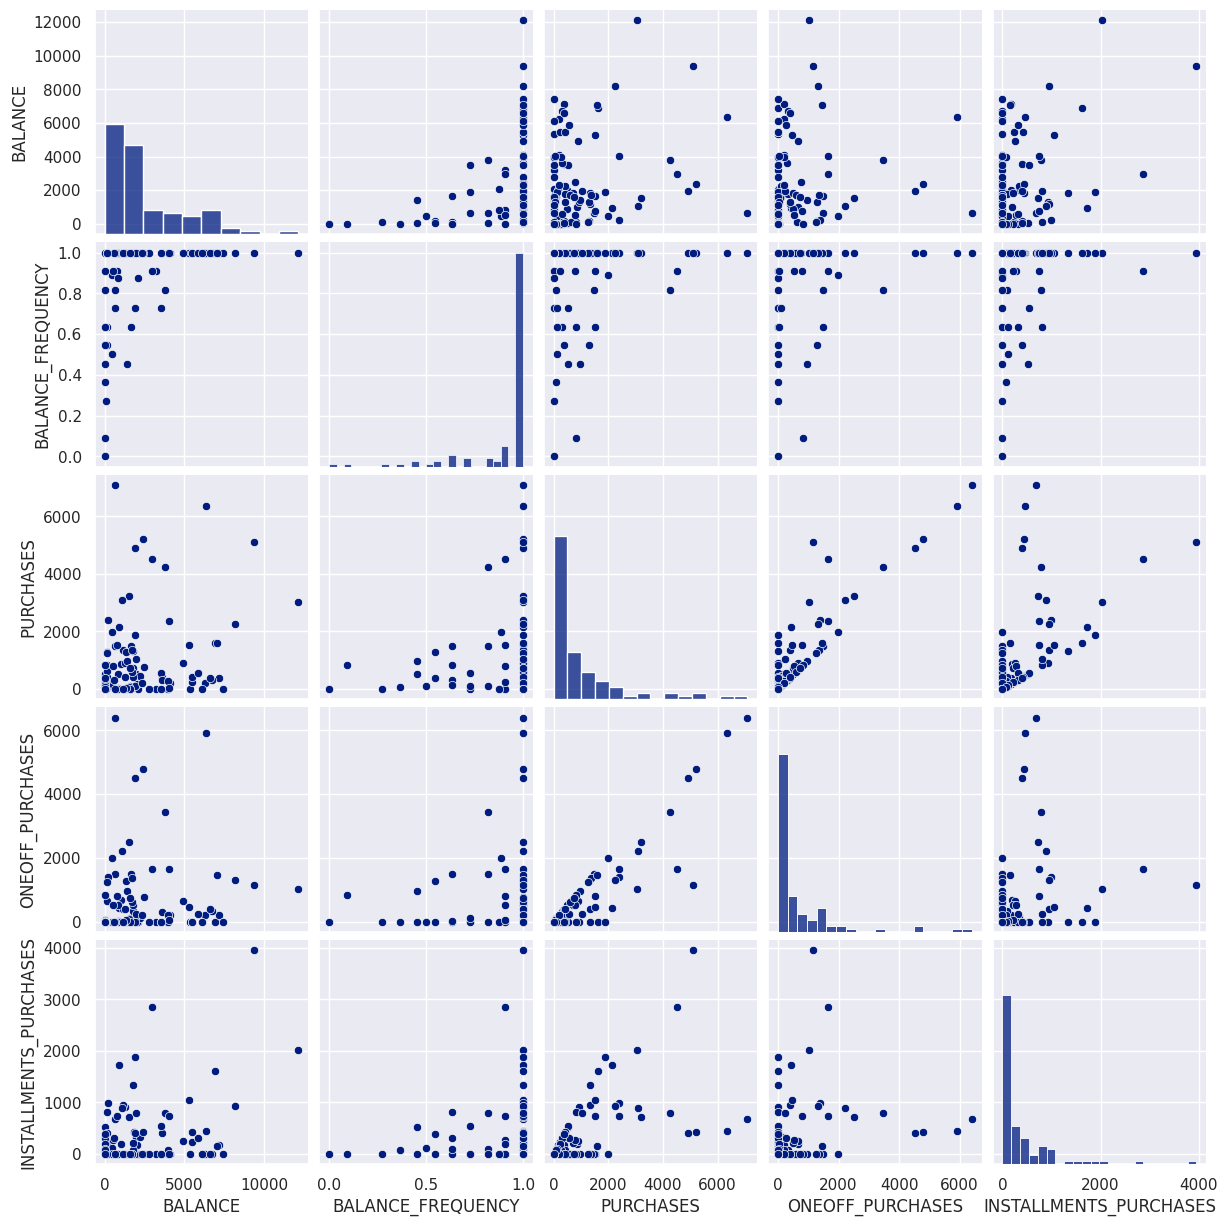

In [ ]:
df2 = df.iloc[0:100,0:5]
sns.pairplot(df2)

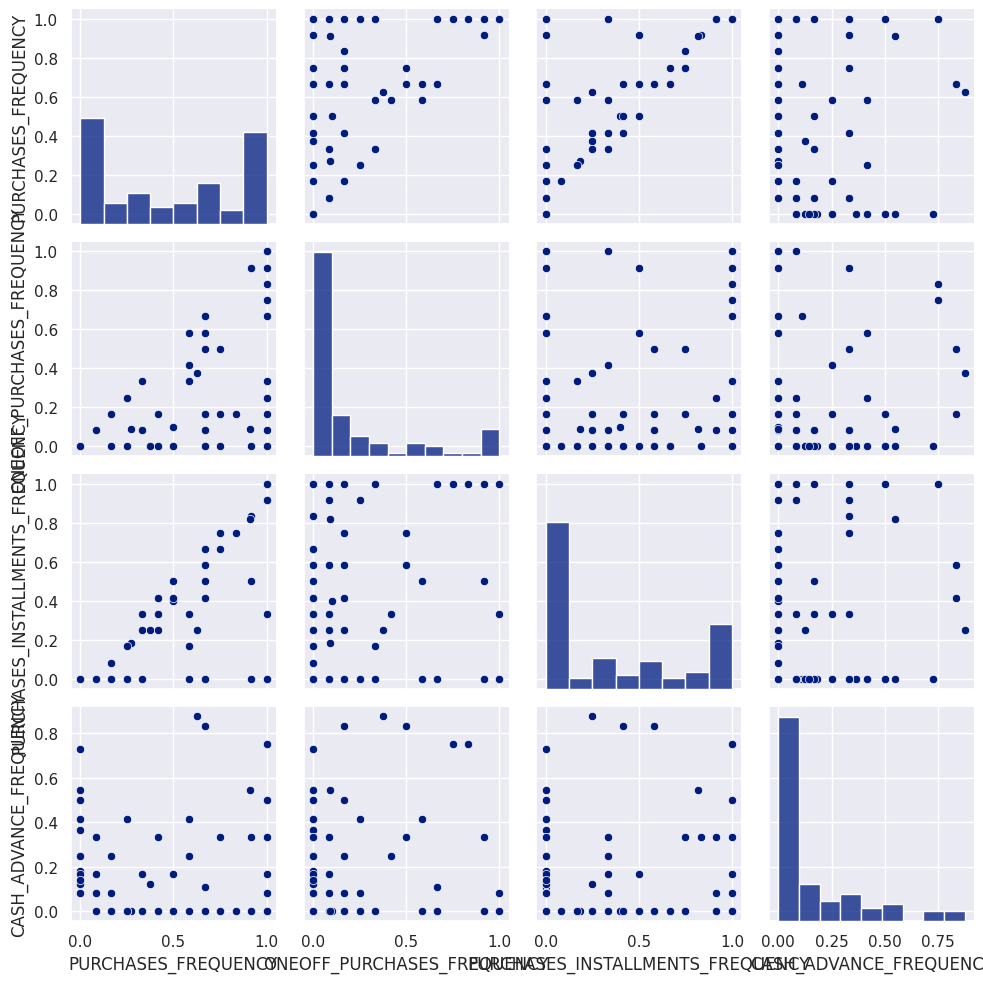

In [ ]:
df3 = df.iloc[0:100,6:10]
sns.pairplot(df3)
plt.tight_layout()

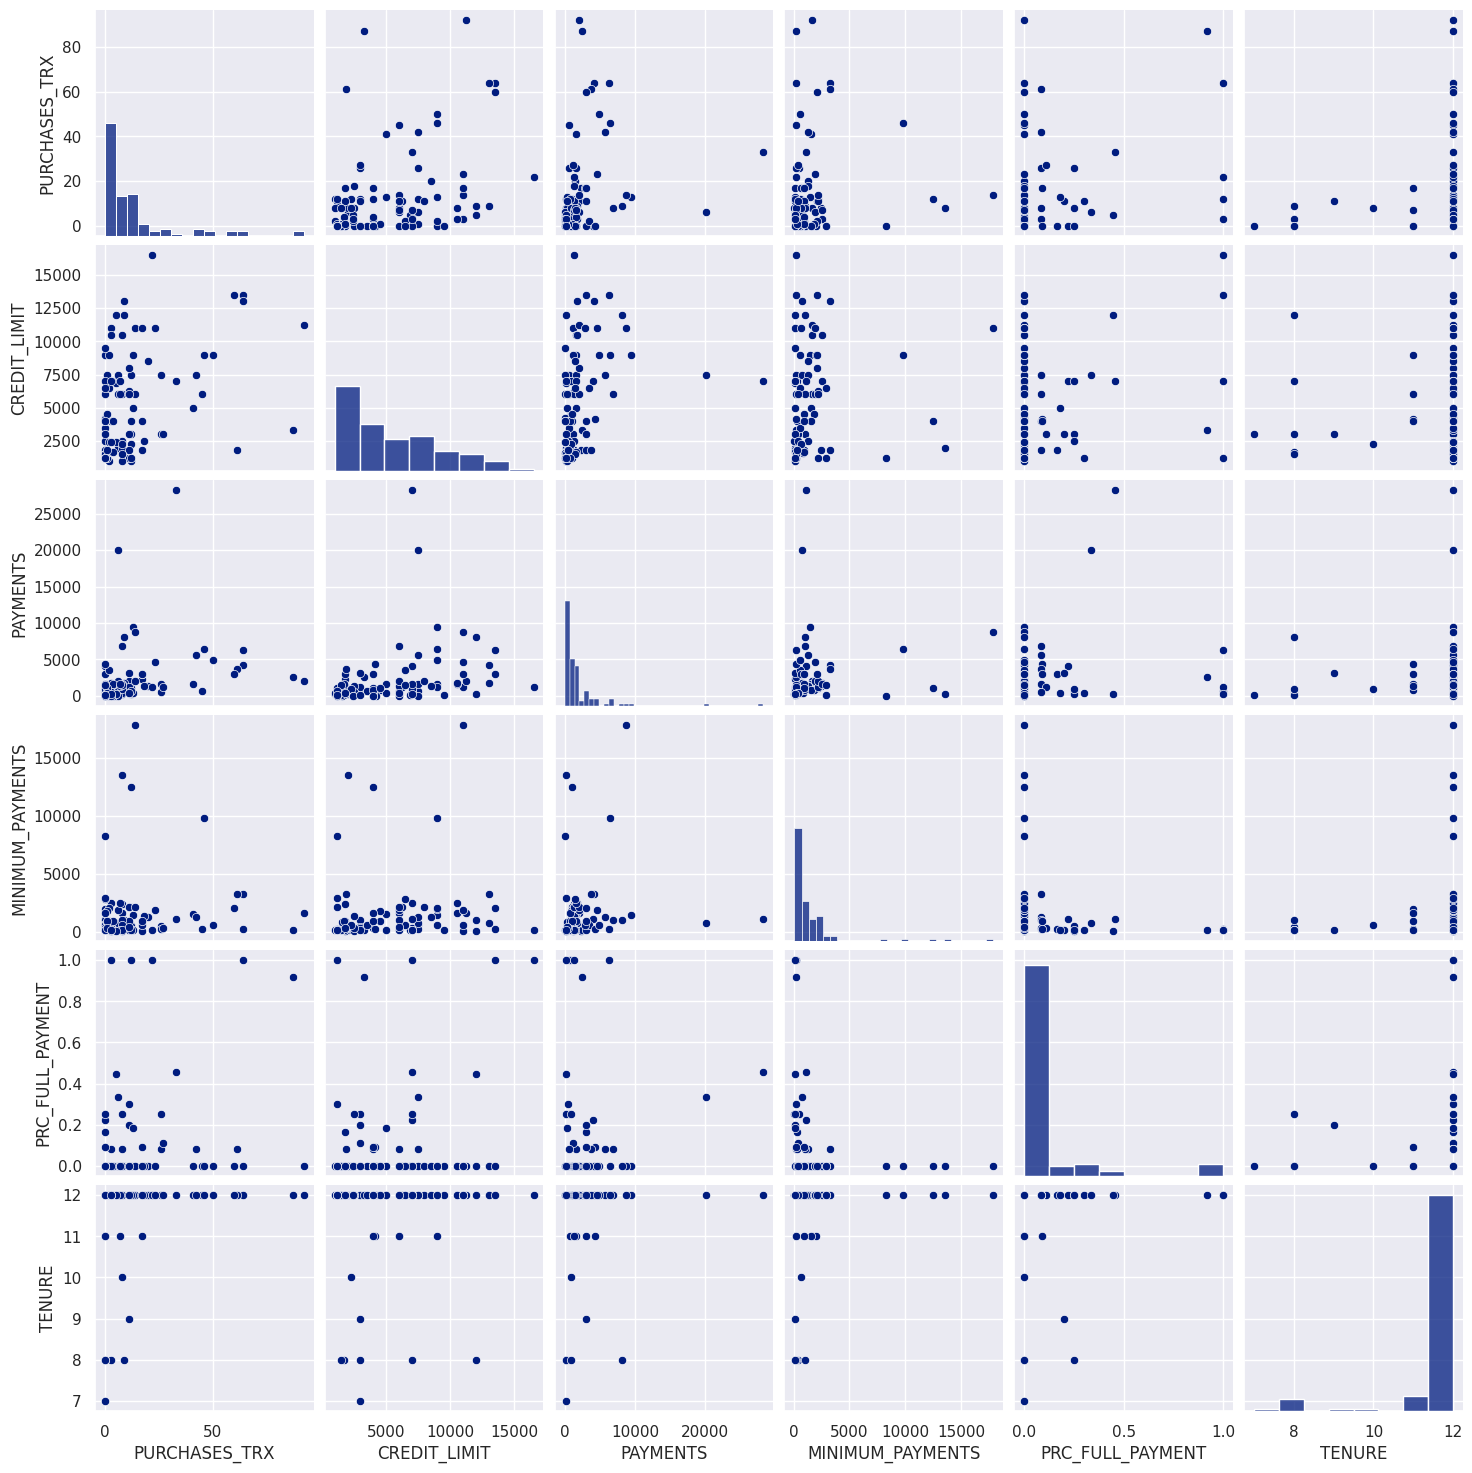

In [ ]:
df4 = df.iloc[0:100,11:17]
sns.pairplot(df4)

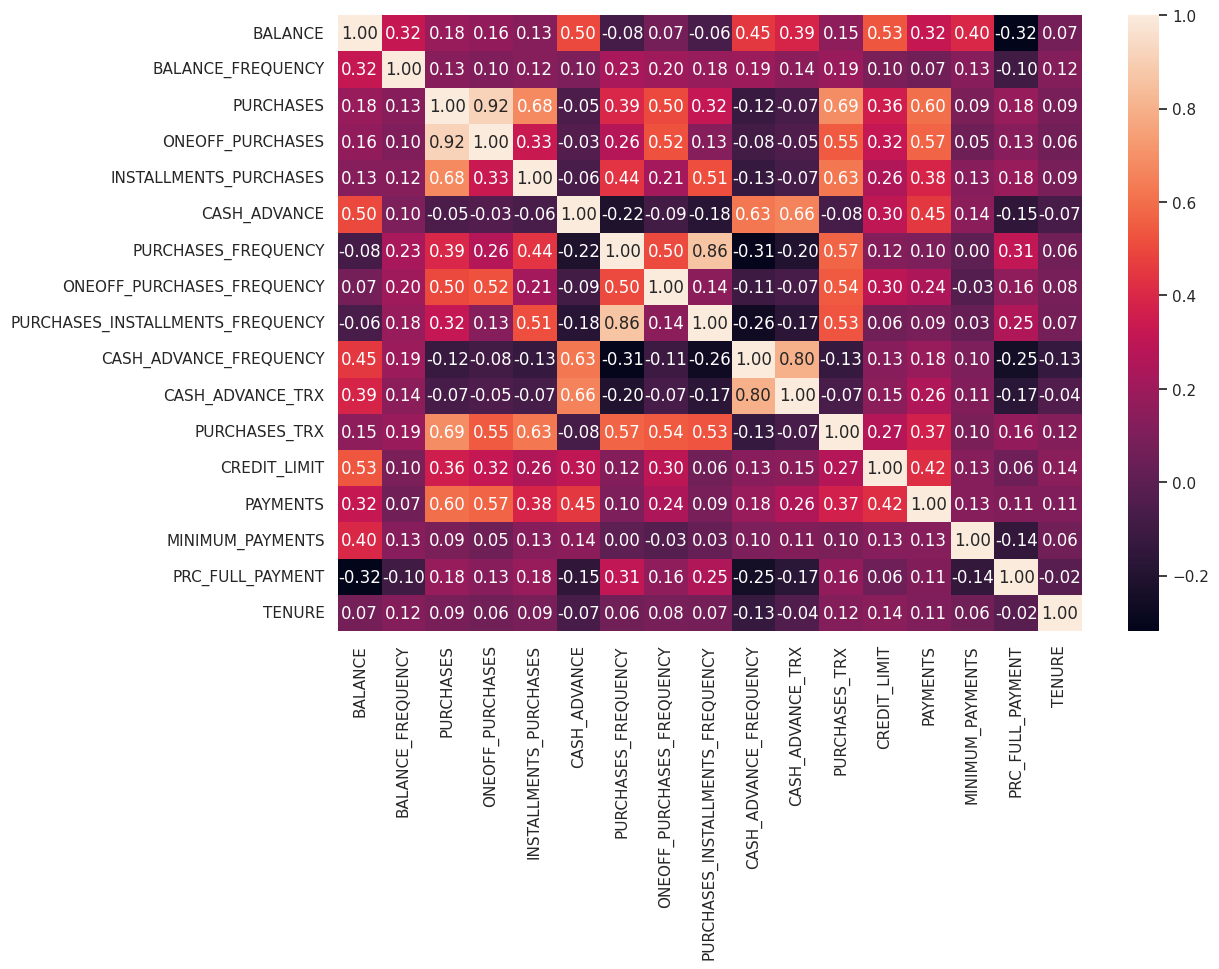

In [ ]:
""" Matrice di correlazine: valuto visivamente la correlazione tramite l' indice Pearson
"""
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()


**PRE- PROCESSING**

In [ ]:
df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
replace_with = df.mean(numeric_only=True)
df = df.fillna(replace_with)

In [ ]:
df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
""" Normalizzo le features e ridefinisco un nuovo dataframe
"""

features = df[['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE','PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

**CLUSTERING**

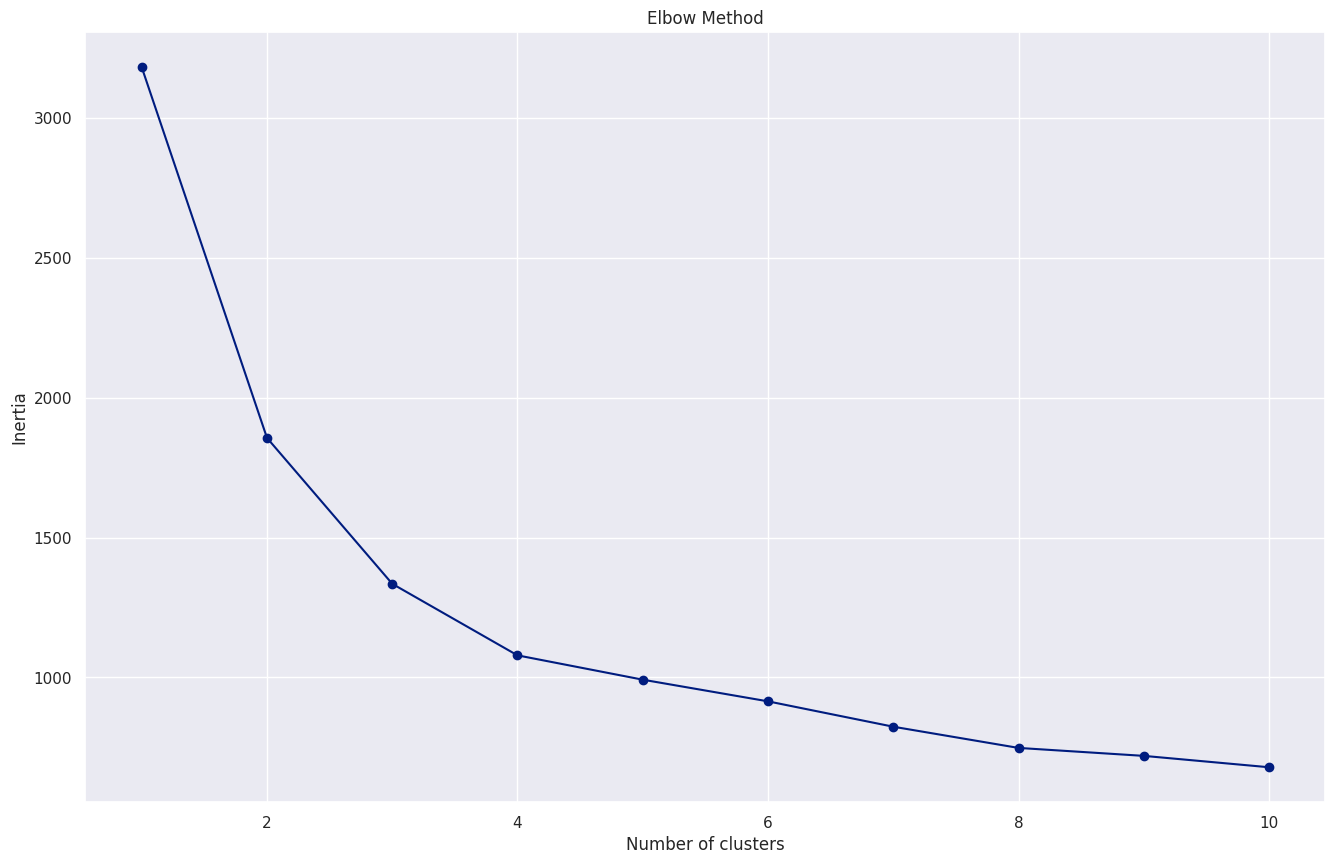

In [ ]:
def plot_elbow_method(df_norm):
    ssd = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=RANDOM_SEED)
        kmeans.fit(df_norm)
        ssd.append(kmeans.inertia_)
    plt.plot(range(1, 11), ssd, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()


plot_elbow_method(df_norm)

In [ ]:
""" Faccio il clustering con il logaritmo Kmeans
"""

kmeans = KMeans(n_clusters=4, init='k-means++', random_state= RANDOM_SEED)
df_norm['Cluster'] = kmeans.fit_predict(df_norm)
kmeans.fit(df_norm)
kmeans.inertia_

1078.8686006165044

In [ ]:
print(df_norm.columns)

Index(['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')


In [ ]:
"""Valutazione dei cluster tramite silhouette score
"""
silhouette_avg = silhouette_score(df_norm, df_norm['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6753066506719976


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


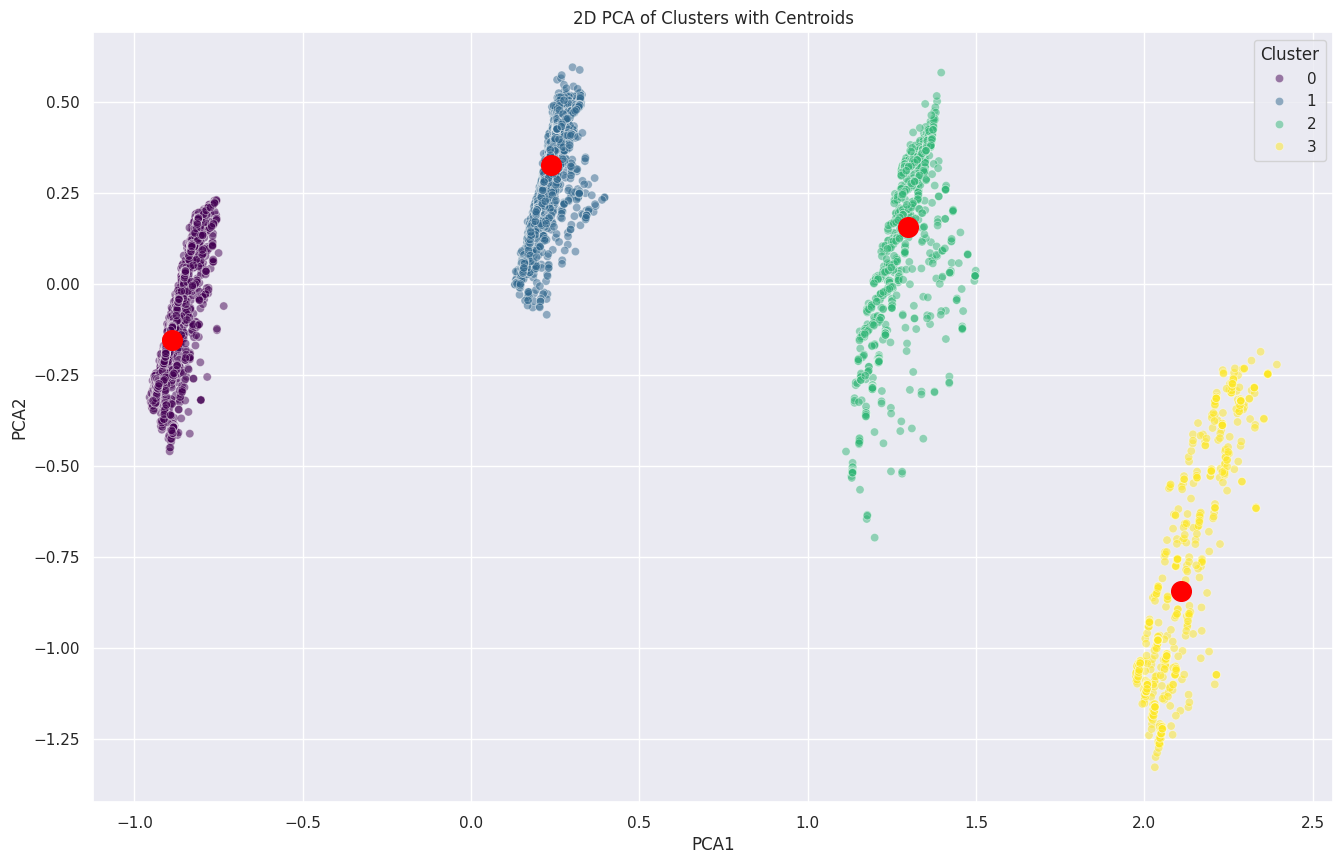

In [ ]:
""" Per visualizzare i cluster in uno scatterplot ho utilizzato la riduzione dimensione PCA a due dimensioni mantenendo la stessa proporzione di varianza
"""
pca = PCA(n_components=2)
components = pca.fit_transform(df_norm)


df_norm ['PCA1'] = components[:, 0]
df_norm ['PCA2'] = components[:, 1]


centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)


sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_norm, palette='viridis', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='o')
plt.title('2D PCA of Clusters with Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

**INTERPRETAZIONE DEI CLUSTER**

In [ ]:
"""Riporto i cluster nel DataFrame originale non normalizzato e con l' identificativo CUST_ID presente
"""

df_original['Cluster'] = df_norm['Cluster']

df_original.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
""" statistiche di media e conteggio per ogni cluster
"""

numerical_columns = df_original.select_dtypes(include='number').columns

cluster_stats = df_original.groupby('Cluster')[numerical_columns].mean().round(2)

cluster_stats['Count'] = df_original['Cluster'].value_counts()

print(cluster_stats)

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                            
0        1799.58               0.85     276.42            218.00   
1        1876.63               0.94    1756.79            963.02   
2         188.68               0.85    1894.51           1090.37   
3        1257.63               0.78     412.46            295.68   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                         58.64       1326.98                 0.14   
1                        794.04        724.89                 0.88   
2                        804.72         99.07                 0.79   
3                        117.21       1644.39                 0.33   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                       

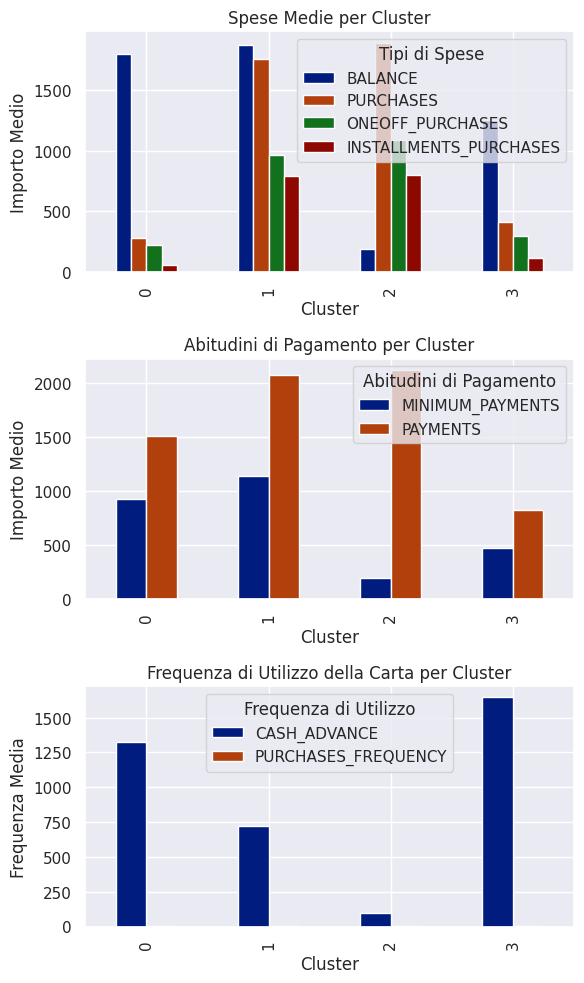

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Grafico delle spese medie
cluster_stats[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Spese Medie per Cluster')
axes[0].set_ylabel('Importo Medio')
axes[0].legend(title='Tipi di Spese')

# Grafico delle abitudini di pagamento
cluster_stats[['MINIMUM_PAYMENTS', 'PAYMENTS']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Abitudini di Pagamento per Cluster')
axes[1].set_ylabel('Importo Medio')
axes[1].legend(title='Abitudini di Pagamento')

# Grafico della frequenza di utilizzo della carta
cluster_stats[['CASH_ADVANCE', 'PURCHASES_FREQUENCY']].plot(kind='bar', ax=axes[2])
axes[2].set_title('Frequenza di Utilizzo della Carta per Cluster')
axes[2].set_ylabel('Frequenza Media')
axes[2].legend(title='Frequenza di Utilizzo')


plt.tight_layout()
plt.show()

In [ ]:
""" Analizzo el dettaglio i cluster in base a: SPESE MEDIE, ABITUDINI DI PAGAMENTO, FREQUENZA DI UTILIZZO DELLA CARTA
"""

for cluster_id in cluster_stats.index:
    print(f"Cluster {cluster_id} Analysis:")
    print("Spese medie:")
    print(f"  - BALANCE: {cluster_stats.loc[cluster_id, 'BALANCE']:.2f}")
    print(f"  - PURCHASES: {cluster_stats.loc[cluster_id, 'PURCHASES']:.2f}")
    print(f"  - ONEOFF_PURCHASES: {cluster_stats.loc[cluster_id, 'ONEOFF_PURCHASES']:.2f}")
    print(f"  - INSTALLMENTS_PURCHASES: {cluster_stats.loc[cluster_id, 'INSTALLMENTS_PURCHASES']:.2f}")
    print("Abitudini di pagamento:")
    print(f"  - MINIMUM_PAYMENTS: {cluster_stats.loc[cluster_id, 'MINIMUM_PAYMENTS']:.2f}")
    print(f"  - PAYMENTS: {cluster_stats.loc[cluster_id, 'PAYMENTS']:.2f}")
    print(f"  - PRC_FULL_PAYMENT: {cluster_stats.loc[cluster_id, 'PRC_FULL_PAYMENT']:.2f}")
    print("Frequenza di utilizzo della carta:")
    print(f"  - CASH_ADVANCE: {cluster_stats.loc[cluster_id, 'CASH_ADVANCE']:.2f}")
    print(f"  - PURCHASES_FREQUENCY: {cluster_stats.loc[cluster_id, 'PURCHASES_FREQUENCY']:.2f}")
    print(f"  - CASH_ADVANCE_FREQUENCY: {cluster_stats.loc[cluster_id, 'CASH_ADVANCE_FREQUENCY']:.2f}")
    print("__________________________________")



Cluster 0 Analysis:
Spese medie:
  - BALANCE: 1799.58
  - PURCHASES: 276.42
  - ONEOFF_PURCHASES: 218.00
  - INSTALLMENTS_PURCHASES: 58.64
Abitudini di pagamento:
  - MINIMUM_PAYMENTS: 923.79
  - PAYMENTS: 1508.09
  - PRC_FULL_PAYMENT: 0.04
Frequenza di utilizzo della carta:
  - CASH_ADVANCE: 1326.98
  - PURCHASES_FREQUENCY: 0.14
  - CASH_ADVANCE_FREQUENCY: 0.18
__________________________________
Cluster 1 Analysis:
Spese medie:
  - BALANCE: 1876.63
  - PURCHASES: 1756.79
  - ONEOFF_PURCHASES: 963.02
  - INSTALLMENTS_PURCHASES: 794.04
Abitudini di pagamento:
  - MINIMUM_PAYMENTS: 1145.12
  - PAYMENTS: 2073.43
  - PRC_FULL_PAYMENT: 0.06
Frequenza di utilizzo della carta:
  - CASH_ADVANCE: 724.89
  - PURCHASES_FREQUENCY: 0.88
  - CASH_ADVANCE_FREQUENCY: 0.10
__________________________________
Cluster 2 Analysis:
Spese medie:
  - BALANCE: 188.68
  - PURCHASES: 1894.51
  - ONEOFF_PURCHASES: 1090.37
  - INSTALLMENTS_PURCHASES: 804.72
Abitudini di pagamento:
  - MINIMUM_PAYMENTS: 198.62
  - 

**SVILUPPO DELLE STRATEGIE DI MARKETING **


*  CLUSTER 0 : ridurre la dipendenza dagli anticipi in contanti offrendo maggiori promozioni, sconti o programmi di cashback. incentivare gli acuisti a rate per ridurre il saldo e abbassare l' importo dei pagamenti minimi rispetto al torale dei pagamenti.


*  CLUSTER 1 :investire sul consolidamento del rapporto con il cliente, in quanto si tratta di clienti con alte sepese e alte frequezne di acquisto. Utilizzare i dati sulle spese per comprendere meglio le preferenze e proporre promozioni e programmi inerenti alle proprie categorie di spese più frequenti. incentivare il pagamento completo offrendo dei tassi di interesse promozionali.


*  CLUSTER 2 : categoria di clienti fianziariamente più sicura, caratterizzata da un saldo basso e una buona propensione agli acquisti sia a rate che in unica soluzione. L' alta percentuale di pagamenti completi suggerisce una buona educazione finanziaria. Aumentare il livello di credito a breve termine e considerata l' affidabilità, e proporre programmi di investimento a medio/lungo termine con incremeto della customer satisfaction e consolidamento del rapporto.


*  CLUSTER 3 : analizzare le abitudini di spesa e proporre promozioni per acquisti a rate così da incrementare la propensione agli acquisti che risulta essere bassa. Essendo bassa anche la percentuale del pagamento completo e un' alta frequenza di anticipo di contante, è utile incentivare gli acquisti e contemporaneamente coinvolge i clienti in programmi di consulenza finanziaria per avere una crescita consapevole nel tempo.


Una strategia comune da mettere in atto è quella di proporre ai clienti pillole di consulenza finanziaria per aumentare la propria consapevolezza ed educazione finanziaria, affichè si possa instaurare con il cliente un rapporto duraturo e finanziariamente stabile nel tempo. In base al cluster di appartenzenza e quindi alla propensione di spesa e anche al tipo di affidamento risultante dalla segmentazione in cluster, adattare questo percorso su più livelli di complessità e capacità finanziaria con progrmmi premianti consistenti in veri e propri sconti sui tassi di interesse che annualmente vengono riconosciuti al cliente. Aumentando il merito creditizio aumenterà la possibiità di proporre altri strumenti finanziari diversificando l' offerta su più clienti e riducendo il rischio.